In [1]:
import pandas as pd

In [3]:
df1 = pd.read_csv("202409-Cyclistic.csv")

In [5]:
df1.head(10)

,ride_id,rideable_type,started_at,ended_at,day_of_week,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 15
0,21E002AD4C956A62,electric_bike,9/5/24 16:09,9/5/24 16:09,5,31,NaN,NaN,NaN,NaN,41.880000,-87.630000,41.880000,-87.630000,casual,NaN
1,93629D785DA94F8C,electric_scooter,9/13/24 17:25,9/13/24 17:26,6,31,NaN,NaN,NaN,NaN,41.890000,-87.630000,41.890000,-87.630000,casual,NaN
2,EE4C3E3A51FCAFDE,electric_bike,9/10/24 15:56,9/10/24 15:56,3,31,NaN,NaN,NaN,NaN,41.870000,-87.650000,41.870000,-87.650000,casual,NaN
3,F73C19F688D63EEC,electric_scooter,9/21/24 12:59,9/21/24 12:59,7,31,NaN,NaN,NaN,NaN,41.940000,-87.710000,41.940000,-87.700000,casual,NaN
4,A72A3D712A848B4B,electric_bike,9/18/24 17:38,9/18/24 17:39,4,31,NaN,NaN,NaN,NaN,41.890000,-87.650000,41.890000,-87.650000,casual,NaN
5,275B315CB7358126,electric_bike,9/29/24 21:15,9/29/24 21:16,1,31,NaN,NaN,NaN,NaN,41.920000,-87.650000,41.920000,-87.650000,casual,NaN
6,F1722528A0CD5A33,electric_scooter,9/17/24 9:05,9/17/24 9:06,3,31,Desplaines St & Jackson Blvd,15539,NaN,NaN,41.878119,-87.643948,41.880000,-87.640000,member,NaN
7,7311365D43421EE7,electric_bike,9/14/24 15:18,9/14/24 15:18,7,31,Stockton Dr & Wrightwood Ave,13276,Stockton Dr & Wrightwood Ave,13276,41.931266,-87.638798,41.931320,-87.638742,casual,NaN
8,246666A7C3E697FA,electric_scooter,9/26/24 15:13,9/26/24 15:14,5,31,Clinton St & Lake St,13021,NaN,NaN,41.885658,-87.641973,41.890000,-87.640000,casual,NaN
9,1DCF78B18AB92CB6,electric_scooter,9/8/24 14:39,9/8/24 14:40,1,31,Lincoln Ave & Belle Plaine Ave,TA1309000026,Lincoln Ave & Belle Plaine Ave,TA1309000026,41.956004,-87.680161,41.956004,-87.680161,member,NaN


In [7]:
import matplotlib.pyplot as plt

In [9]:
df1_weekday_count = df1[['day_of_week','member_casual']].value_counts()

In [11]:
df1_weekday_count.head(14)

day_of_week  member_casual
2            member           76464
4            member           75345
5            member           73562
3            member           64987
6            member           64396
1            casual           62738
7            casual           60472
             member           56896
1            member           56396
2            casual           50380
6            casual           46285
5            casual           42851
4            casual           41301
3            casual           34446
Name: count, dtype: int64

In [13]:
weekday_count_df = df1_weekday_count.reset_index()
weekday_count_df.columns = ['day_of_week', 'member_casual' , 'count']
weekday_count_df.head(15)

,day_of_week,member_casual,count
0,2,member,76464
1,4,member,75345
2,5,member,73562
3,3,member,64987
4,6,member,64396
5,1,casual,62738
6,7,casual,60472
7,7,member,56896
8,1,member,56396
9,2,casual,50380


In [15]:
pivot_df1 = weekday_count_df.pivot_table(index='day_of_week' , columns='member_casual' , values='count')
pivot_df1

member_casual,casual,member
day_of_week,,
1,62738.0,56396.0
2,50380.0,76464.0
3,34446.0,64987.0
4,41301.0,75345.0
5,42851.0,73562.0
6,46285.0,64396.0
7,60472.0,56896.0


In [17]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_df1['weekday'] = weekday

<Axes: xlabel='weekday'>

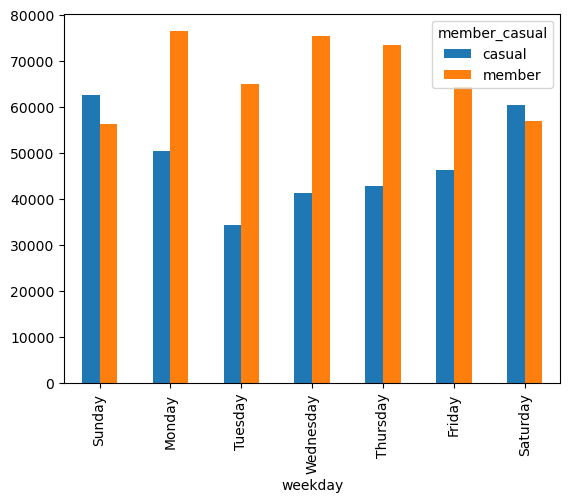

In [19]:
pivot_df1.plot(kind='bar' , x='weekday')

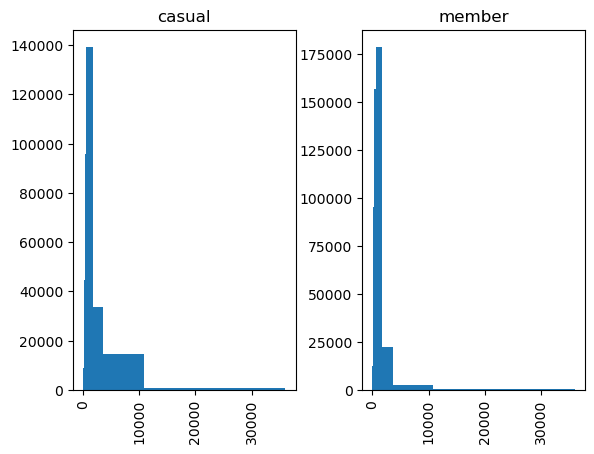

In [21]:
df1.hist(column='ride_length', bins=[30,120,300,600,1800,3600,10800,36000], by='member_casual')
plt.show()

In [23]:
df1_weekday_bike_membership = df1[['day_of_week','member_casual' , 'rideable_type']].value_counts()

In [25]:
weekday_bike_membership = df1_weekday_bike_membership.reset_index()

In [27]:
weekday_bike_membership.columns = ['day_of_week' , 'member_casual' , 'rideable_type' , 'count']

In [29]:
pivot_wbm = weekday_bike_membership.pivot_table(index = 'day_of_week' , columns = ['member_casual' , 'rideable_type'] , values = 'count')

In [31]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_wbm['weekday'] = weekday

<Axes: xlabel='weekday'>

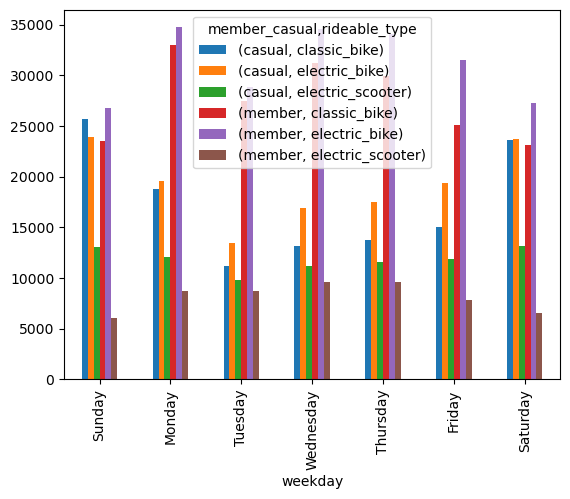

In [33]:
pivot_wbm.plot(kind = 'bar' , x='weekday')

In [35]:
import folium

In [37]:
from folium.plugins import HeatMap

In [39]:
m = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)


In [41]:
member_geo_data = df1[df1['member_casual']=='member']
member_geo_data = member_geo_data[['start_lat' , 'start_lng']]

In [43]:
member_geo_data.head()

,start_lat,start_lng
6,41.878119,-87.643948
9,41.956004,-87.680161
12,41.842426,-87.617182
15,41.972097,-87.708572
16,41.895504,-87.706164


In [45]:
HeatMap(member_geo_data).add_to(m)

In [47]:
m.save('heatmapmember-September.html')

In [49]:
casual_geo_data = df1[df1['member_casual']=='casual']
casual_geo_route = casual_geo_data[['start_lat' , 'start_lng' , 'end_lat' , 'end_lng']]
casual_geo_data = casual_geo_data[['start_lat' , 'start_lng']]

In [51]:
m1 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [53]:
HeatMap(casual_geo_data).add_to(m1)

In [55]:
m1.save('heatmapcasual-September.html')

In [57]:
m2 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [59]:
casual_geo_route.head()

,start_lat,start_lng,end_lat,end_lng
0,41.88,-87.63,41.88,-87.63
1,41.89,-87.63,41.89,-87.63
2,41.87,-87.65,41.87,-87.65
3,41.94,-87.71,41.94,-87.70
4,41.89,-87.65,41.89,-87.65


In [61]:
casual_geo_route = casual_geo_route.dropna()
for index in casual_geo_route.index:
    route = [[casual_geo_route.loc[index, 'start_lat'] ,casual_geo_route.loc[index,'start_lng']] , [casual_geo_route.loc[index,'end_lat'], casual_geo_route.loc[index,'end_lng']]] 
    folium.PolyLine(locations = route , color='blue' , weight=0.5 , opacity = 0.4).add_to(m2)

In [63]:
m2.save('routesCasual-September.html')